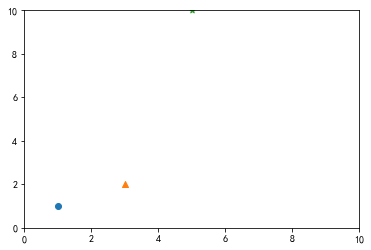

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.sans-serif'] = ['SimHei']  #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False   #正常显示图像中的负号

from matplotlib import animation             #动态图模块

'''
假设一个场景中有3辆卡车，在一个广场上行驶，现需要画出3辆卡车的位置
使用类来模拟卡车，该类有3个属性，x和y表示其位置，marker表示卡车标识；
1个方法，move表示随机移动了一步，同时使用随机数来模拟卡车随机行驶的效果
'''

#这是一个卡车类
class car():
    # 没有默认值的参数在定义时应放在了有默认值的参数的前面，否则会报错
    def __init__(self,marker,x=1,y=1):
        self.x = x
        self.y = y
        self.marker = marker
    
    def move(self):
        '''在东南西北4个方向随机选一个方向走一步，步长未定，然后更新坐标'''
        # 随机移动一步
        self.x = self.x + np.random.randint(low=-1,high=2,size=1)[0]
        self.y = self.y + np.random.randint(low=-1,high=2,size=1)[0]
        # 防止越界
        self.x = self.x if self.x > 0 else 0
        self.x = self.x if self.x < 10 else 10
        self.y = self.y if self.y > 0 else 0
        self.y = self.y if self.y < 10 else 10

        
# 实例化3辆车
cars = [car(marker='o'), car(marker='^'), car(marker='*')]

# 绘制一张画布
fig = plt.figure()

# 模拟1000个时间点
i = list(range(1000))

# update是核心函数，在每个时间点操作图形对象
def update(i):
    plt.clf()                      #清空图层
    # 对每辆车进行操作
    for car in cars:
        car.move()                 #移动一步
        
        x = car.x                  #图层输入数据
        y = car.y
        marker = car.marker
        
        plt.xlim(0,10)             #限制图形区域
        plt.ylim(0,10)
        
        plt .scatter(x,y,marker=marker)  #绘制卡车
    return


# Funcanimation函数为绘制动态图的接口函数，传入参数为图层以及操作函数
ani = animation.FuncAnimation(fig,update) 
ani.save('car.gif',writer='pillow')   #报存为gif动图，否则结果不会显示出动态

plt.show()